In [44]:
import astropy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
dat = pd.read_table('vanvelzen12-v1.0.txt',sep=None)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [46]:
dat.keys()

Index([u'#', u'2MASX', u'NED_id', u'ra', u'dec', u'l', u'b', u'Kmag',
       u'Kmag_err', u'z', u'zdist', u'zdist_err', u'D', u'D_err', u'gal_type',
       u'n_sumss', u'n_nvss', u'F1400', u'F1400_err', u'F843', u'F843_err',
       u'Fsyn', u'Lsyn', u'sum_ma', u'max_ma', u'lim_ma', u'max_dist_to_gal',
       u'min_dist_to_gal', u'contour_dist', u'geo_cen_ra', u'geo_cen_dec',
       u'flux_cen_ra', u'flux_cen_dec', u'class'],
      dtype='object')

In [47]:
cat=dat.as_matrix(columns=['ra', 'dec', 'l', 'b','D','Fsyn'])

In [48]:
cat.shape

(575, 6)

In [49]:
cat = cat[cat[:,4]<100]

In [50]:
cat = cat[cat[:,5]>2.6*10**40]

In [51]:
cat.shape

(322, 6)

In [54]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [78]:
c = SkyCoord(l=cat[0][2]*u.degree, b=cat[0][3]*u.degree, frame='galactic')

<Longitude 298.99176 deg>

In [61]:
cat[0]

array([ -5.47489200e+01,   3.17344790e+02,  -6.10082400e+01,
         1.03390000e+01,   2.13574999e+00,   3.41556800e+40])

In [90]:
eq_ra = []
eq_dec = []

for row in cat:
    l = row[2]
    b = row[3]
    c = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
    eq_ra.append(c.gcrs.ra.degree)
    eq_dec.append(c.gcrs.dec.degree)
eq_ra = np.array(eq_ra)
eq_dec = np.array(eq_dec)

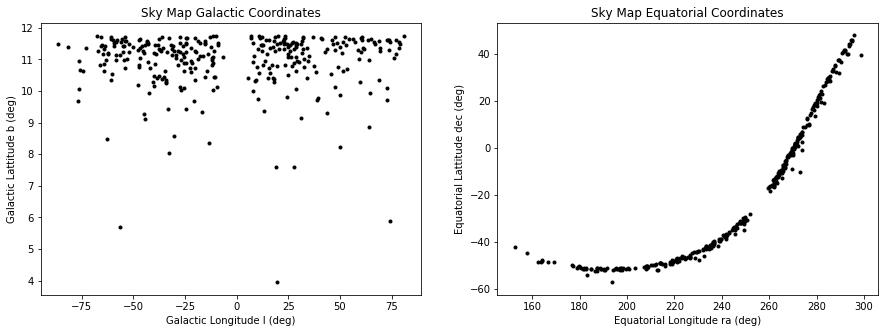

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(cat[:,2],cat[:,3],marker='.',c='k')
plt.xlabel('Galactic Longitude l (deg)')
plt.ylabel('Galactic Lattitude b (deg)')
plt.title('Sky Map Galactic Coordinates')
plt.subplot(1,2,2)
plt.scatter(eq_ra,eq_dec,marker='.',c='k')
plt.xlabel('Equatorial Longitude ra (deg)')
plt.ylabel('Equatorial Lattitude dec (deg)')
plt.title('Sky Map Equatorial Coordinates')
plt.show()

In [104]:
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz

In [118]:
philly = EarthLocation(lat=39.95*u.deg, lon=-75.16*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2017-8-2 23:00:00') - utcoffset

In [119]:
alt = []
az = []

for row in cat:
    l = row[2]
    b = row[3]
    c = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
    az.append(c.transform_to(AltAz(obstime=time,location=philly)).az.degree)
    alt.append(c.transform_to(AltAz(obstime=time,location=philly)).alt.degree)
az = np.array(az)
alt = np.array(alt)

In [120]:
zen = 90 - alt

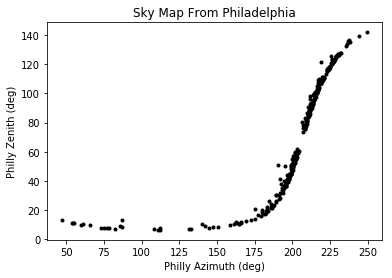

In [124]:
plt.scatter(az,zen,marker='.',c='k')
plt.xlabel('Philly Azimuth (deg)')
plt.ylabel('Philly Zenith (deg)')
plt.title('Sky Map From Philadelphia')
plt.show()

From Philadelphia, we can see all the galaxies with Zenith less than 60 degrees

In [125]:
philly_mask = zen < 60

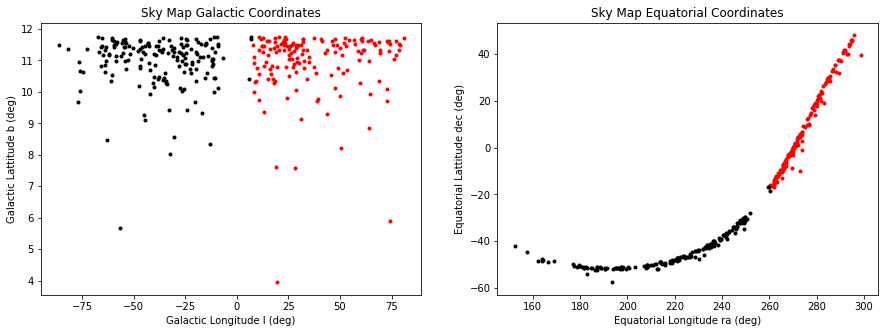

In [128]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(cat[:,2][philly_mask],cat[:,3][philly_mask],marker='.',c='r')
plt.scatter(cat[:,2][np.logical_not(philly_mask)],cat[:,3][np.logical_not(philly_mask)],marker='.',c='k')
plt.xlabel('Galactic Longitude l (deg)')
plt.ylabel('Galactic Lattitude b (deg)')
plt.title('Sky Map Galactic Coordinates')
plt.subplot(1,2,2)
plt.scatter(eq_ra[philly_mask],eq_dec[philly_mask],marker='.',c='r')
plt.scatter(eq_ra[np.logical_not(philly_mask)],eq_dec[np.logical_not(philly_mask)],marker='.',c='k')
plt.xlabel('Equatorial Longitude ra (deg)')
plt.ylabel('Equatorial Lattitude dec (deg)')
plt.title('Sky Map Equatorial Coordinates')
plt.show()

The red points are the galaxies that are visible from Philadelphia, with a max zenith of 60 degrees at the time of observing.